In [1]:
import pandas as pd
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')


Populating the interactive namespace from numpy and matplotlib


In [2]:
# Carregando a base de dados:
dataset = pd.read_csv('mencoes-cr.csv')

In [3]:
# Visualizando as 5 primeiras linhas do Dataframe:
dataset.head()

,id_parlamentar,casa,nome_eleitoral,partido,uf,username,created_at,text,interactions,Outrage,Vagueness,Argumentation,Modalization,Valuation,Sentiment,Presupposition,citadas
0,204379,câmara,ACÁCIO FAVACHO,PROS,AP,acaciofavacho,2020-04-17T02:07:17Z,"Estendemos o auxílio emergencial de R$600,00 p...",140,0.126620,0.111814,0.097171,0.091419,0.092172,0.095672,0.085637,PL 873
1,204379,câmara,ACÁCIO FAVACHO,PROS,AP,acaciofavacho,2020-04-17T01:49:12Z,"Estendemos o auxílio emergencial de R$600,00 p...",19,0.124329,0.112471,0.098068,0.091773,0.093461,0.096263,0.086207,PL 873
2,204528,câmara,ADRIANA VENTURA,NOVO,SP,adrianasounovo,2020-05-15T11:57:38Z,1. Ontem foi aprovado na Câmara o PL 1179/2020...,70,0.124276,0.108892,0.091316,0.136516,0.099668,0.153423,0.147246,PL 1179
3,204528,câmara,ADRIANA VENTURA,NOVO,SP,adrianasounovo,2020-04-02T19:27:52Z,"Ontem foi aprovado na Câmara o PL 864/2020, de...",128,0.095934,0.122586,0.110559,0.105750,0.104987,0.108591,0.122991,PL 864
4,204528,câmara,ADRIANA VENTURA,NOVO,SP,adrianasounovo,2020-03-26T15:10:45Z,"Ontem aprovamos na Câmara o PL 696/2020, que a...",122,0.093756,0.106566,0.106002,0.125345,0.097141,0.097061,0.123097,PL 696


In [4]:
dataset.dropna().describe()

,id_parlamentar,interactions,Outrage,Vagueness,Argumentation,Modalization,Valuation,Sentiment,Presupposition
count,2084.000000,2084.000000,2084.000000,2084.000000,2084.000000,2084.000000,2084.000000,2084.000000,2084.000000
mean,139422.639155,389.074856,0.104909,0.106730,0.100125,0.111423,0.108230,0.106386,0.108678
std,74049.665457,1943.525208,0.017626,0.016131,0.015688,0.019349,0.015842,0.026658,0.026136
min,22.000000,0.000000,0.060342,0.052434,0.051798,0.050323,0.049037,0.051148,0.044044
25%,74161.000000,5.000000,0.093220,0.095540,0.089602,0.097714,0.097232,0.085655,0.089519
50%,171617.000000,19.000000,0.101499,0.105293,0.097976,0.109982,0.107198,0.103247,0.106149
75%,204453.000000,90.250000,0.112860,0.116871,0.108850,0.124346,0.117988,0.123160,0.125654
max,205865.000000,30196.000000,0.220888,0.176224,0.171843,0.187795,0.189139,0.213053,0.210320


In [5]:
dataset.shape

(2084, 17)

In [6]:
# Tabela de correlação entre as variáveis
corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm')

,id_parlamentar,interactions,Outrage,Vagueness,Argumentation,Modalization,Valuation,Sentiment,Presupposition
id_parlamentar,1.000000,0.017428,0.010221,0.027861,0.041162,0.044170,0.078669,0.037628,0.054211
interactions,0.017428,1.000000,0.120636,0.108030,0.017006,0.100835,0.090724,0.139134,0.102933
Outrage,0.010221,0.120636,1.000000,0.510691,0.076404,0.313148,0.198249,0.652312,0.460610
Vagueness,0.027861,0.108030,0.510691,1.000000,0.464646,0.571685,0.453323,0.482361,0.494812
Argumentation,0.041162,0.017006,0.076404,0.464646,1.000000,0.396393,0.356258,0.161571,0.311229
Modalization,0.044170,0.100835,0.313148,0.571685,0.396393,1.000000,0.566413,0.642788,0.804905
Valuation,0.078669,0.090724,0.198249,0.453323,0.356258,0.566413,1.000000,0.214140,0.305542
Sentiment,0.037628,0.139134,0.652312,0.482361,0.161571,0.642788,0.214140,1.000000,0.883998
Presupposition,0.054211,0.102933,0.460610,0.494812,0.311229,0.804905,0.305542,0.883998,1.000000


In [7]:
#As 10 mais citadas 
dataabc = dataset["citadas"].value_counts(dropna=True)[:10] 

dataabc = dataabc.rename_axis('citadas').reset_index(name='counts')

dataabc.head(10)  

,citadas,counts
0,MP 927,168
1,PL 1075,127
2,PEC 45,123
3,MP 936,122
4,PL 873,95
5,PLP 39,89
6,MP 966,67
7,PL 1142,65
8,PL 3267,64
9,PL 2633,53


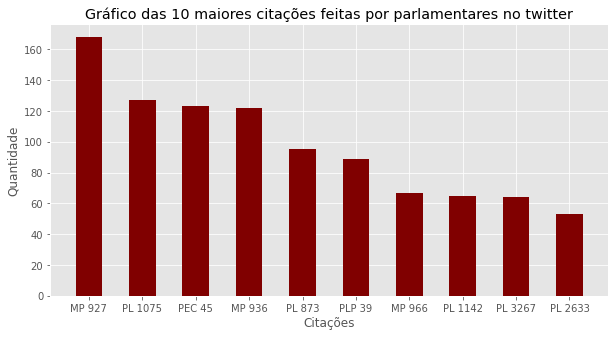

In [8]:
citacoes = list(dataabc['citadas']) 
qtds = list(dataabc['counts']) 
   
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(citacoes, qtds, color ='maroon',  
        width = 0.5) 
  
plt.xlabel("Citações") 
plt.ylabel("Quantidade") 
plt.title("Gráfico das 10 maiores citações feitas por parlamentares no twitter") 
plt.show() 

In [9]:
#Agrupamento das citações por partido
agrupamentoPorPartidoCitacoes = dataset.groupby('partido')[u'citadas'].value_counts()

agrupamentoPorPartidoCitacoes.rename_axis().reset_index(name='counts')

,partido,citadas,counts
0,AVANTE,PL 1179,1
1,DEM,PL 3267,59
2,DEM,PEC 15,5
3,DEM,PL 1282,5
4,DEM,PLP 39,5
...,...,...,...
709,SOLIDARIEDADE,MP 936,1
710,SOLIDARIEDADE,PL 1389,1
711,SOLIDARIEDADE,PL 1562,1
712,SOLIDARIEDADE,PL 675,1


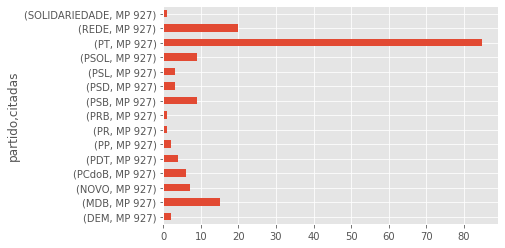

In [10]:
#A MP mais citada, como foi citada por partido?
#A MP 927 é sobre as medidas trabalhistas para enfrentamento do estado de calamidade pública reconhecido pelo Decreto Legislativo nº 6, de 20 de março de 2020, e da emergência de saúde pública de importância internacional decorrente do coronavírus (covid-19).
df2 = dataset[dataset['citadas'] =='MP 927']
df2.groupby(u'partido')['citadas'].value_counts().plot.barh()

In [11]:
#Agrupamento das citações por nome dos parlamentares
agrupamentoCitacoesNomeEleitoral = dataset.groupby('citadas')[u'nome_eleitoral'].value_counts()

agrupamentoCitacoesNomeEleitoral.rename_axis().reset_index(name='counts')

,citadas,nome_eleitoral,counts
0,MP 925,FABIANO CONTARATO,1
1,MP 927,PAULO PAIM,14
2,MP 927,FABIANO CONTARATO,12
3,MP 927,PAULÃO,7
4,MP 927,CELSO MALDANER,6
...,...,...,...
1219,PLP 49,ROGÉRIO CORREIA,1
1220,PLP 62,EDUARDO BISMARCK,3
1221,PRC 11,HUGO LEAL,1
1222,PRC 11,JOÃO H. CAMPOS,1


In [12]:
#Quantas interações por partido?
agrupamentoPartidoInteracoes = dataset.groupby('partido')[u'interactions'].value_counts()

agrupamentoPartidoInteracoes = agrupamentoPartidoInteracoes.rename_axis().reset_index(name='counts')

totalInteracoes = agrupamentoPartidoInteracoes[["interactions", "counts"]].product(axis=1)

totalInteracoes = totalInteracoes.rename_axis().reset_index(name='counts')

totalInteracoes

#agrupamentoPartidoInteracoes.head(5)

,index,counts
0,0,21
1,1,14
2,2,26
3,3,0
4,4,33
...,...,...
1022,1022,2
1023,1023,3
1024,1024,6
1025,1025,7


In [13]:
#new = agrupamentoPartidoInteracoes[['partido']].copy()

#new = totalInteracoes[['counts']].copy()

new = pd.DataFrame([agrupamentoPartidoInteracoes.partido, totalInteracoes.counts]).transpose()

new 

,partido,counts
0,AVANTE,21
1,DEM,14
2,DEM,26
3,DEM,0
4,DEM,33
...,...,...
1022,SOLIDARIEDADE,2
1023,SOLIDARIEDADE,3
1024,SOLIDARIEDADE,6
1025,SOLIDARIEDADE,7


In [14]:
#Gera um dicionário com todas as interações que um partido recebeu
dicionario_interacoes = {k: g["counts"].tolist() for k,g in new.groupby("partido")}

dicionario_interacoes.keys()

dict_keys(['AVANTE', 'DEM', 'MDB', 'NOVO', 'PATRI', 'PCdoB', 'PDT', 'PHS', 'PMN', 'PODE', 'PP', 'PPS', 'PR', 'PRB', 'PROS', 'PSB', 'PSC', 'PSD', 'PSDB', 'PSL', 'PSOL', 'PT', 'PTB', 'PV', 'REDE', 'S/Partido', 'SOLIDARIEDADE'])

In [15]:
#Capturando a soma das interações por partido e adicionando numa estrutura de dados de dicionario
dict_totalInteracoesPorPartido = {}
for key in dicionario_interacoes:
  dict_totalInteracoesPorPartido[key] = sum(dicionario_interacoes.get(key))

dict_totalInteracoesPorPartido

{'AVANTE': 21,
 'DEM': 33315,
 'MDB': 1693,
 'NOVO': 67594,
 'PATRI': 16,
 'PCdoB': 11402,
 'PDT': 17253,
 'PHS': 2,
 'PMN': 4,
 'PODE': 24509,
 'PP': 39433,
 'PPS': 12890,
 'PR': 1242,
 'PRB': 387,
 'PROS': 949,
 'PSB': 4838,
 'PSC': 6619,
 'PSD': 14117,
 'PSDB': 3753,
 'PSL': 318765,
 'PSOL': 115660,
 'PT': 116929,
 'PTB': 73,
 'PV': 309,
 'REDE': 18714,
 'S/Partido': 318,
 'SOLIDARIEDADE': 27}

In [29]:
dt_fromdict = pd.DataFrame.from_dict(dict_totalInteracoesPorPartido, orient='index').reset_index()

dt_fromdict.columns = ['partido', 'totalInteracoes']

dt_fromdict

,partido,totalInteracoes
0,AVANTE,21
1,DEM,33315
2,MDB,1693
3,NOVO,67594
4,PATRI,16
5,PCdoB,11402
6,PDT,17253
7,PHS,2
8,PMN,4
9,PODE,24509


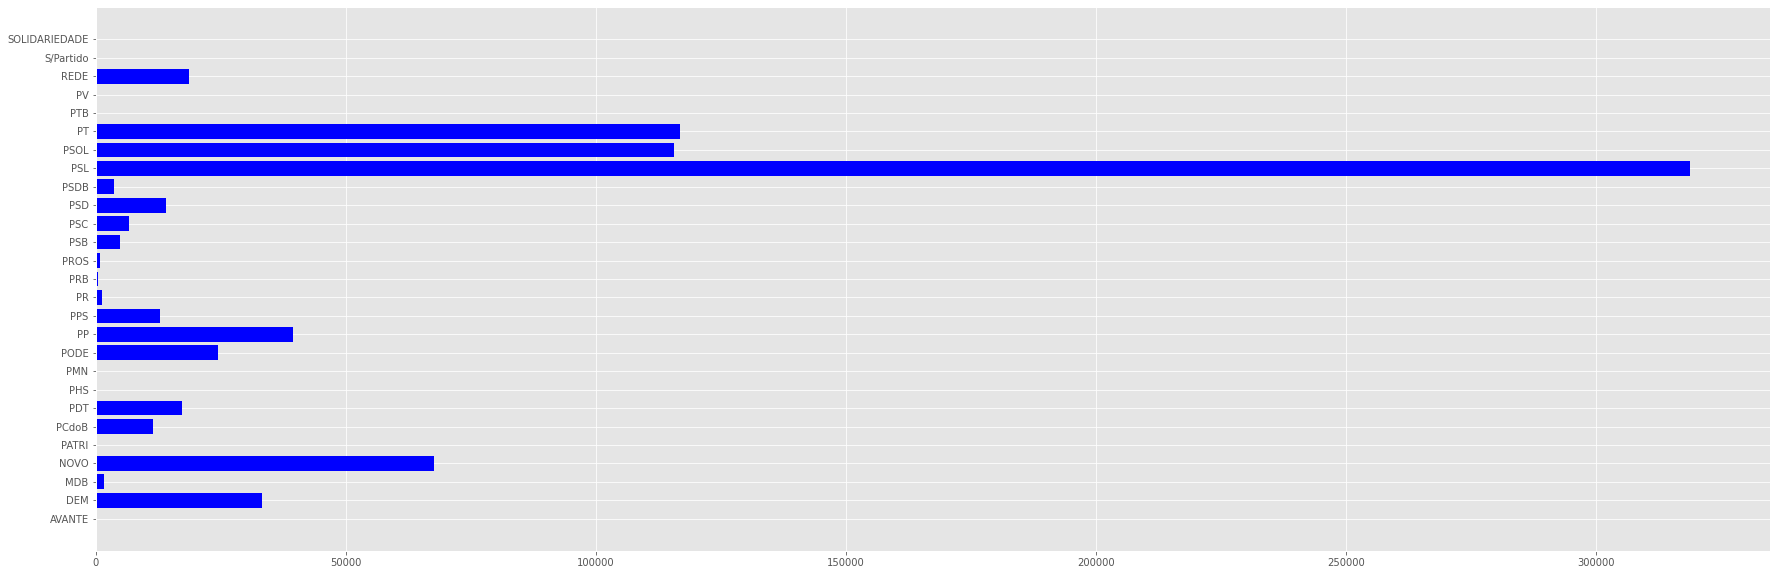

In [42]:
partidos = list(dt_fromdict['partido']) 
totalInteracoesPartidos = list(dt_fromdict['totalInteracoes']) 

fig = plt.figure(figsize = (30, 10)) 

plt.barh(partidos, totalInteracoesPartidos, color ='blue')

plt.show()
   
#fig = plt.figure(figsize = (30, 10)) 
  
# creating the bar plot 
#plt.bar(totalInteracoesPartidos, partidos, color ='maroon', width = 0.5) 
  
#plt.xlabel("Partidos") 
#plt.ylabel("Quantidade de interações") 
##plt.title("Gráfico das interações por partido") 
#plt.show() 